In [1]:
import pandas as pd

medical_df = pd.read_csv('C:/Users/lokes/Downloads/insurance.csv')

medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()


In [8]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Smoking')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Gender')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region',  
                   title='Annual Medical Charges vs Region')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [13]:
px.histogram(medical_df, x='sex', title='Gender Distribution')

In [14]:
px.histogram(medical_df, x='region', title='Region Distribution')

In [15]:
px.histogram(medical_df, x='children', title='Childrens Distributions')

In [16]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

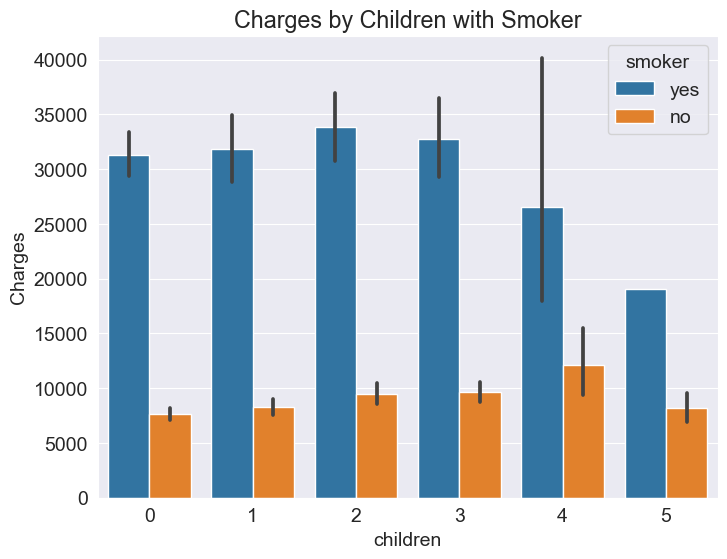

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="children", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Children with Smoker")
plt.show()


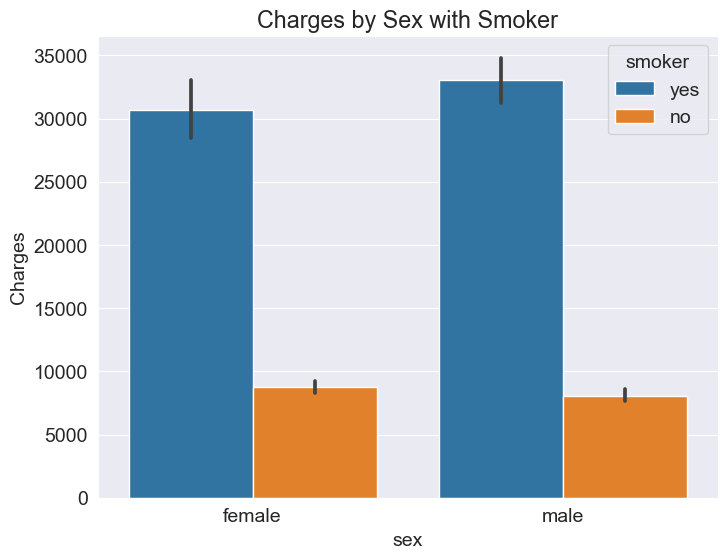

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="sex", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Sex with Smoker")
plt.show()


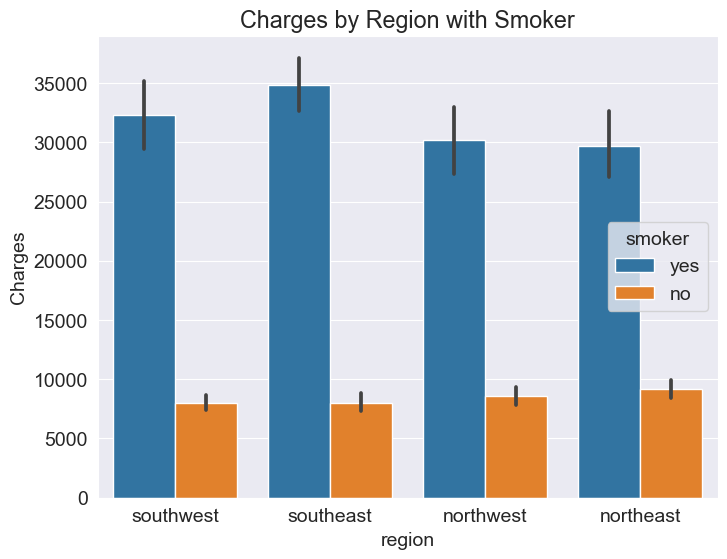

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="region", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Region with Smoker")
plt.show()

In [21]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [22]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [23]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [26]:
import numpy as np
# Select only numeric columns
numeric_df = medical_df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


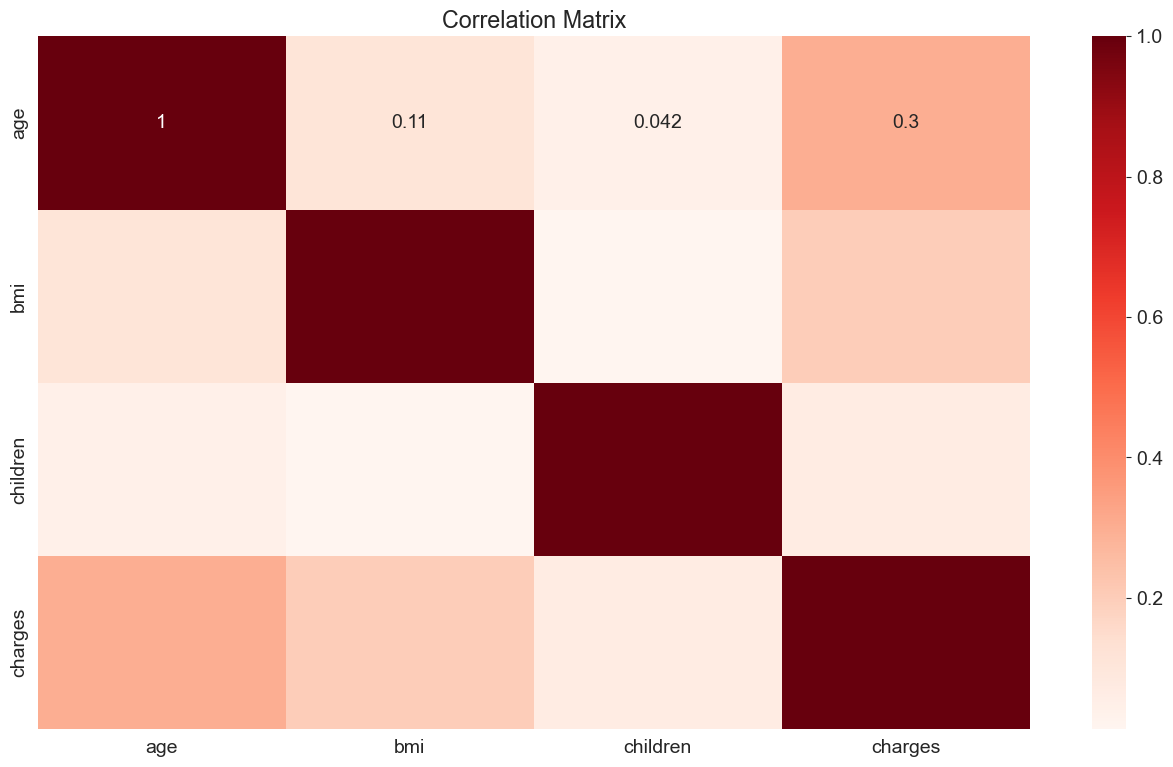

In [28]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

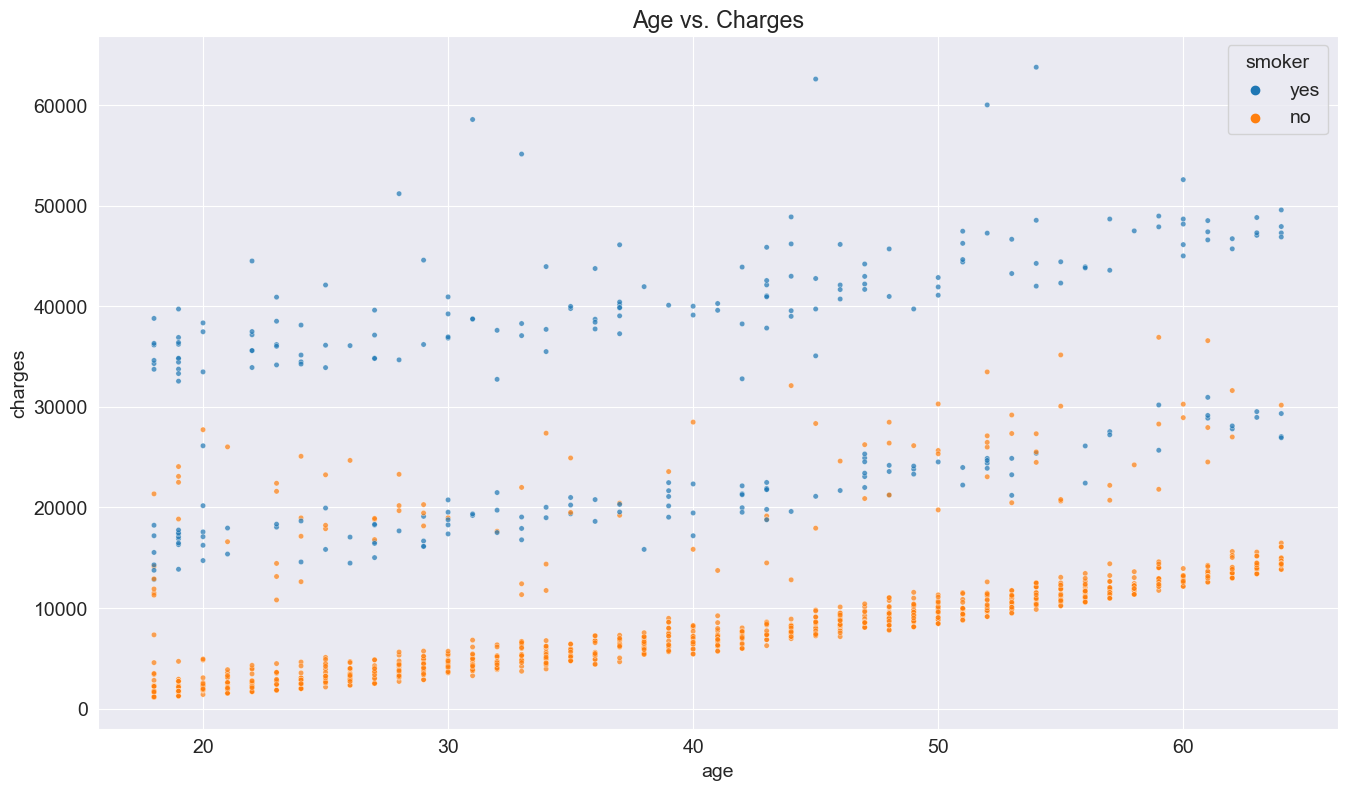

In [29]:
plt.title('Age vs. Charges')
sns.scatterplot(data=medical_df, x='age', y='charges',hue='smoker', alpha=0.7, s=15);

In [30]:
def estimate_charges(age, w, b):
    return w * age + b

In [31]:
age=32
w = 50
b = 100
print("The predicted charge for the given values is:",estimate_charges(age, w, b))

The predicted charge for the given values is: 1700


In [32]:
# we create a pandas series by taking first 10 age values from our dataset
ages=medical_df.age.head(10)
ages

0    19
1    18
2    28
3    33
4    32
5    31
6    46
7    37
8    37
9    60
Name: age, dtype: int64

In [33]:
# Our fuction can take the pandas series of values and create estimated charges for each age.
# The resultant is also a pandas dataframe.
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0    1050
1    1000
2    1500
3    1750
4    1700
5    1650
6    2400
7    1950
8    1950
9    3100
Name: age, dtype: int64

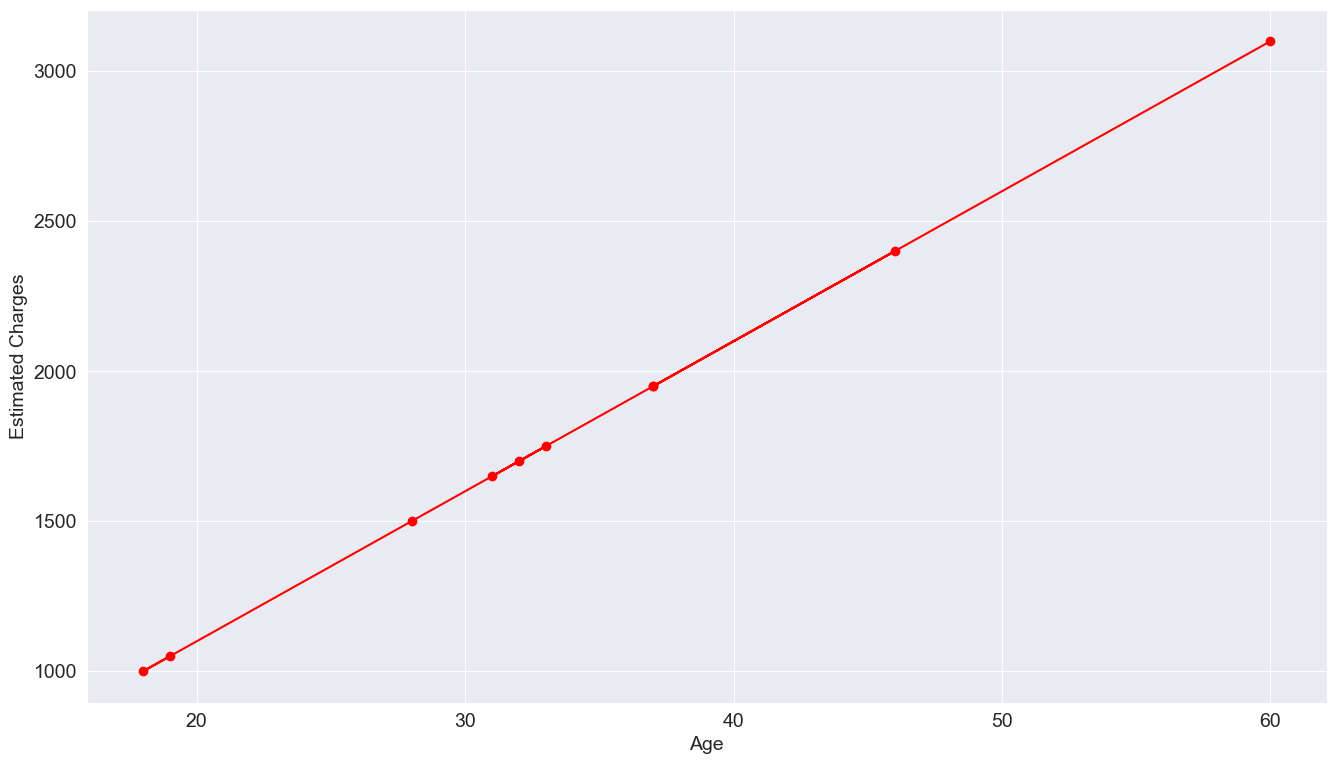

In [34]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

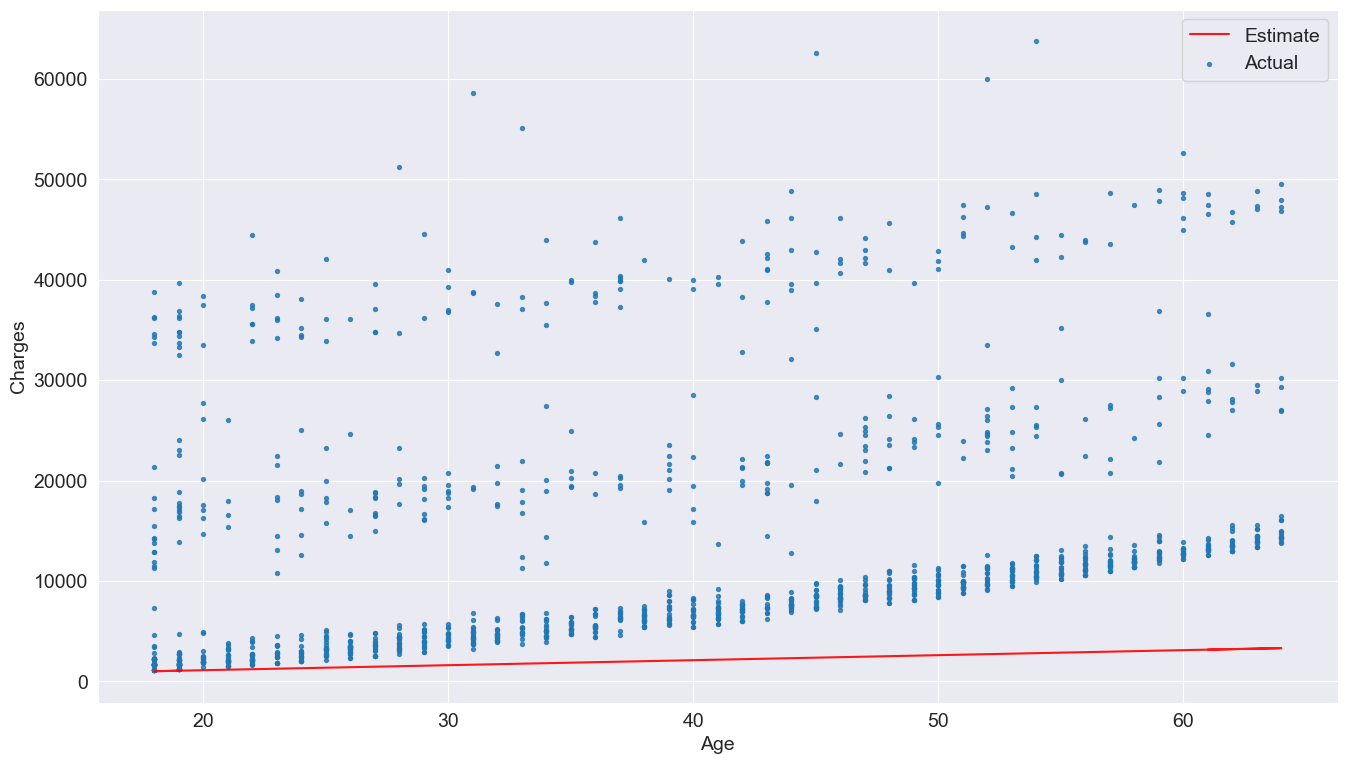

In [35]:
# Repeating the same steps as above but for all the age values
ages=medical_df.age
target = medical_df.charges

estimated_charges = estimate_charges(ages, w, b)

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [36]:
def try_parameters(w, b):
    ages = medical_df.age
    target = medical_df.charges
    
    def estimate_charges(age, w, b):
        return w * age + b
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

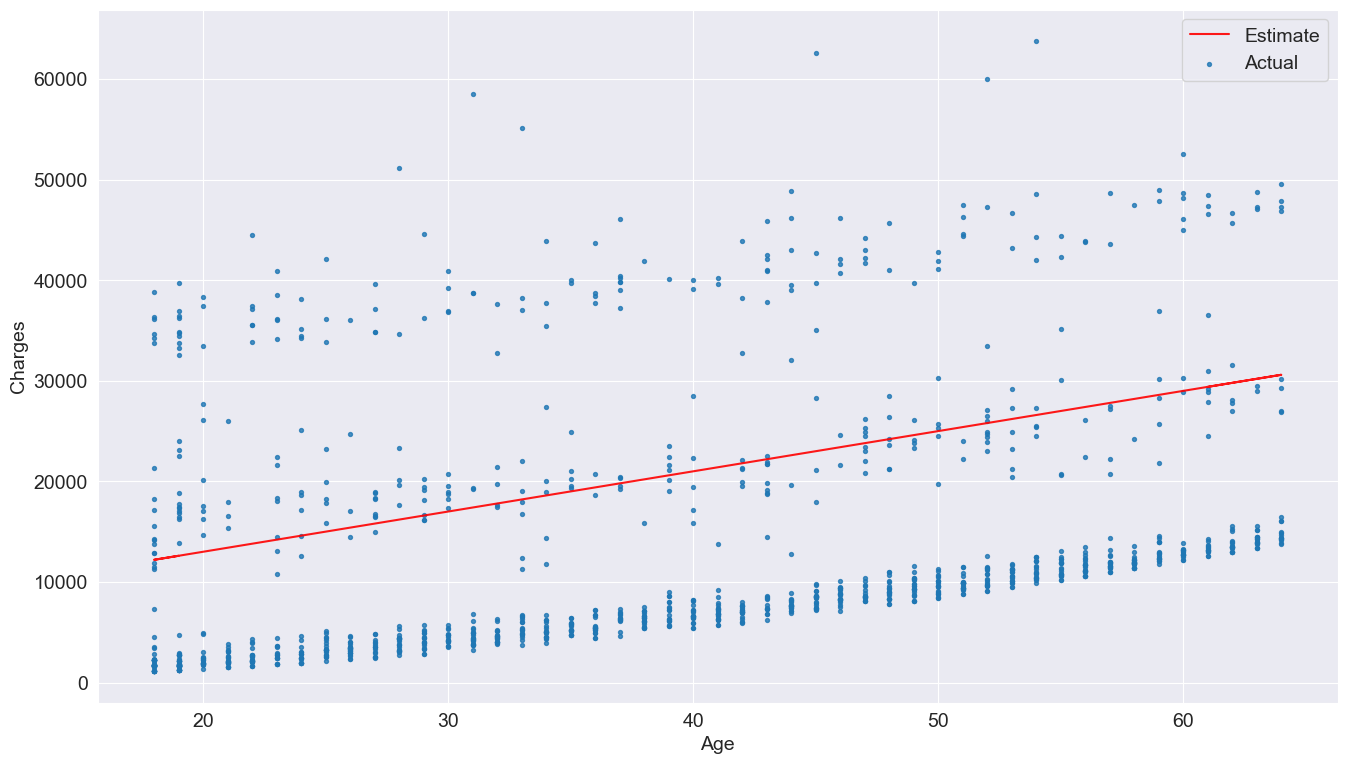

In [37]:
try_parameters(400, 5000)

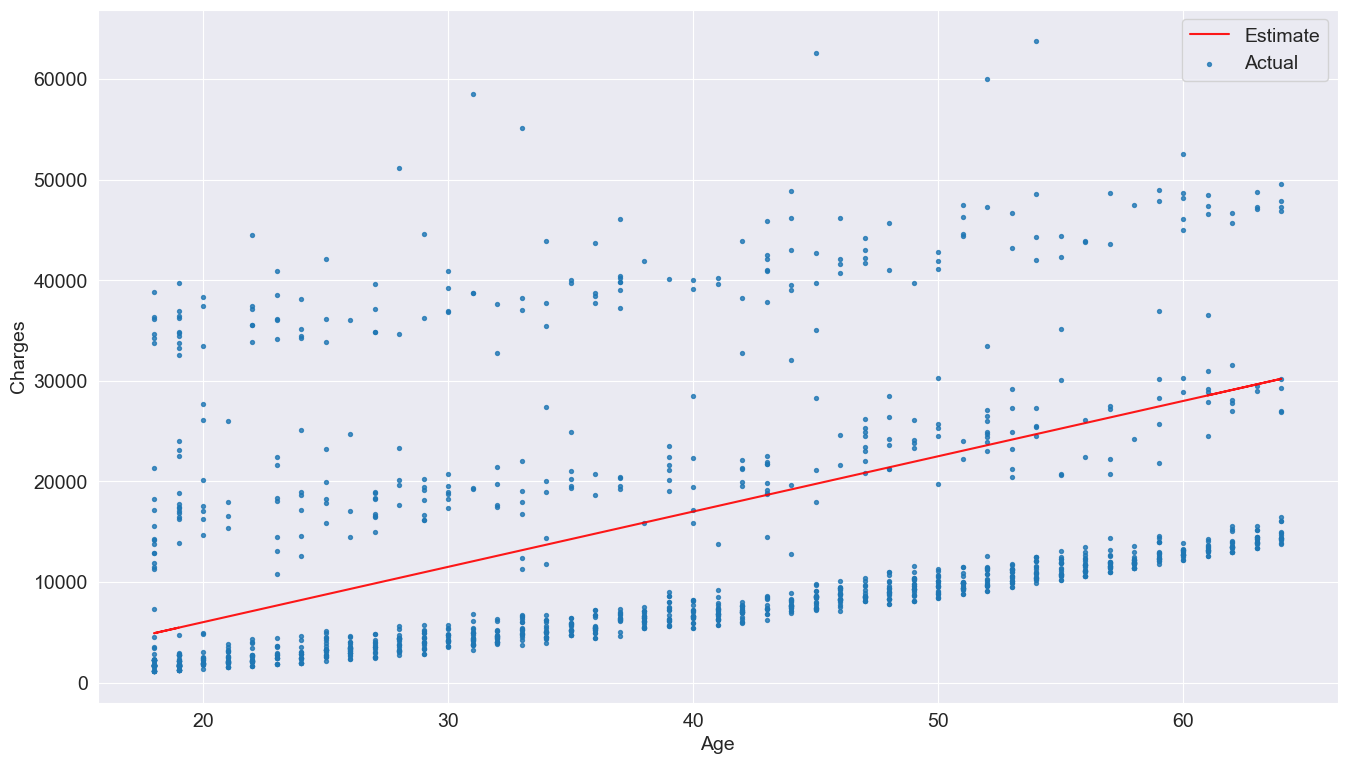

In [38]:
try_parameters(550, -5000)

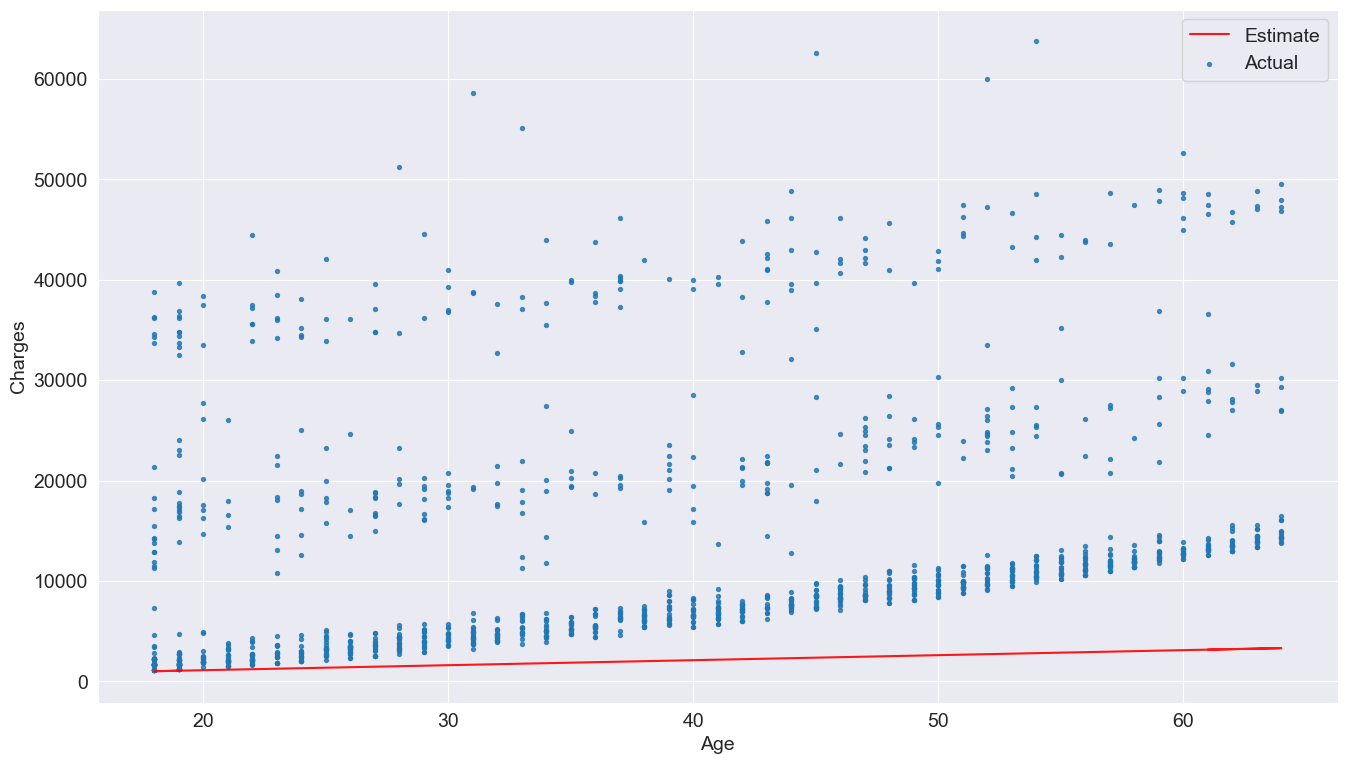

In [39]:
try_parameters(50, 100)

In [40]:
targets = medical_df['charges']
predicted = estimate_charges(medical_df.age, w, b)

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
mse = mean_squared_error(targets, predicted)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 16359.031600298249


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [44]:
help(model.fit) #to Understand how the function Linear Regression works.

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [45]:
inputs = medical_df[['age']]
targets = medical_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1338, 1)
targes.shape : (1338,)


In [46]:
model.fit(inputs, targets)

LinearRegression()

In [47]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 9093.5052354 , 12701.62189674, 18886.96474474])

In [48]:
predictions = model.predict(inputs)

In [49]:
predictions

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 11551.66562075632


In [53]:
# w
model.coef_

array([257.72261867])

In [54]:
# b
model.intercept_

3165.885006063021

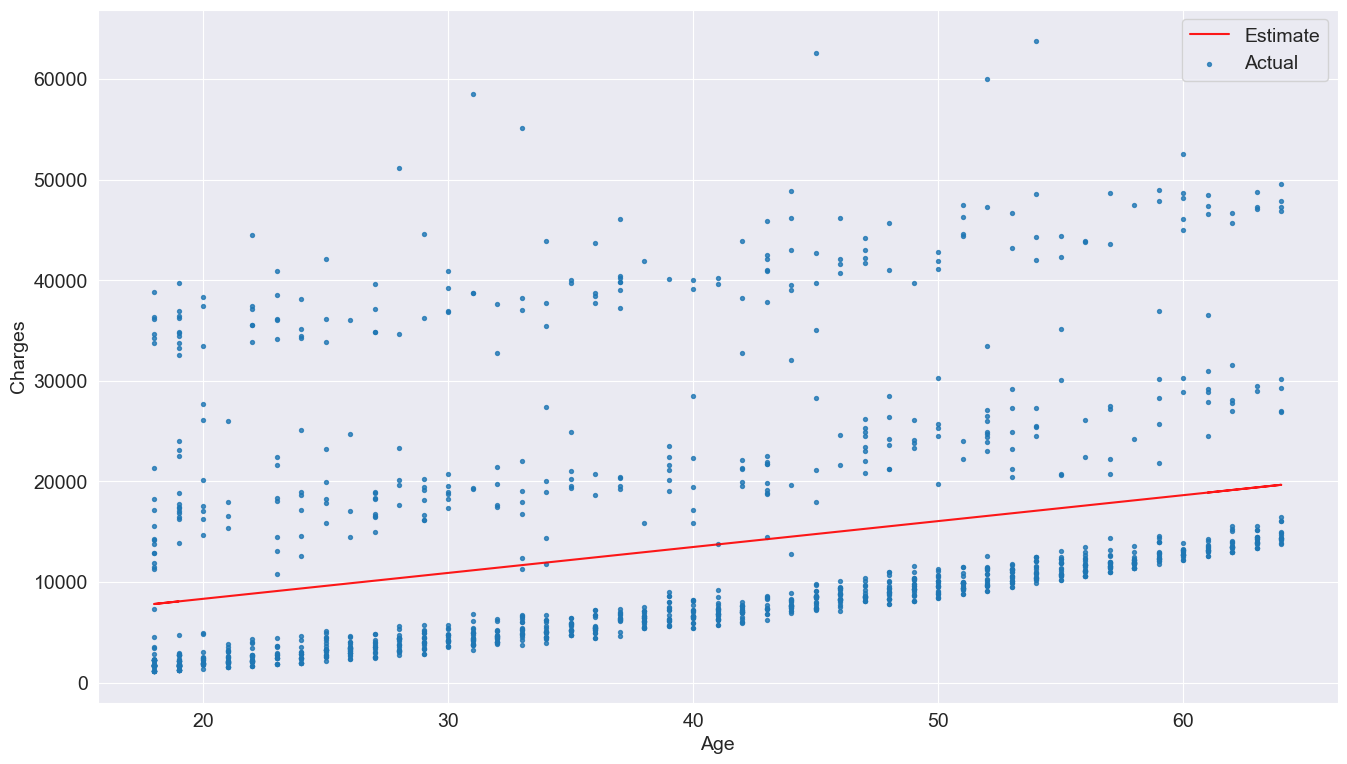

In [55]:
try_parameters(model.coef_, model.intercept_)

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))

# Create inputs and targets
inputs, targets = medical_df[['age']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)  # Now it's using the defined function
print('Loss (RMSE):', loss)


Loss (RMSE): 11551.66562075632


In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))

# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11374.110466839007


In [59]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [60]:
fig = px.scatter(medical_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [61]:
fig = px.scatter_3d(medical_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [62]:
model.coef_, model.intercept_

(array([241.9307779 , 332.96509081]), -6424.804612240769)

In [63]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [64]:
fig = px.strip(medical_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


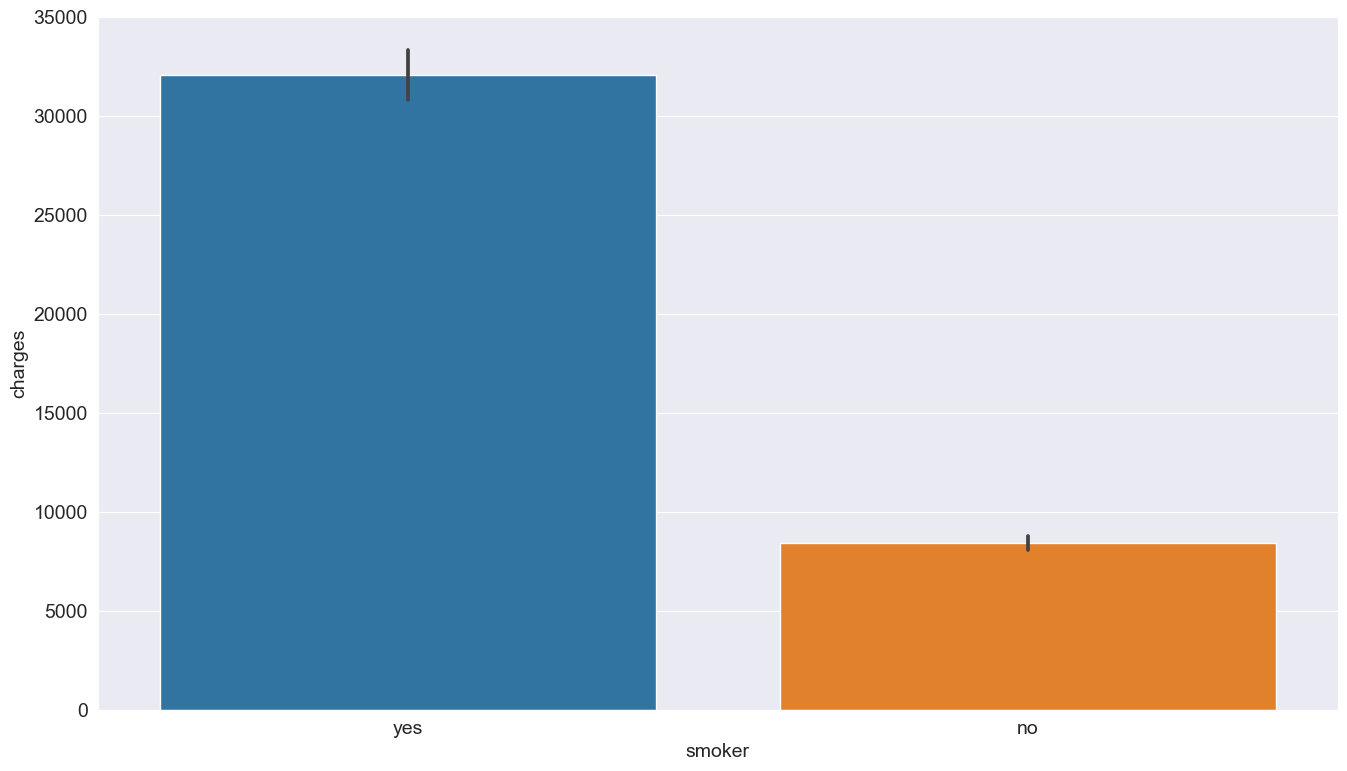

In [66]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [67]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes) #creating a new column `smoker_code` ,
                                                                        # instead of overwriting `smoker` column

In [68]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984772

In [69]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [70]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

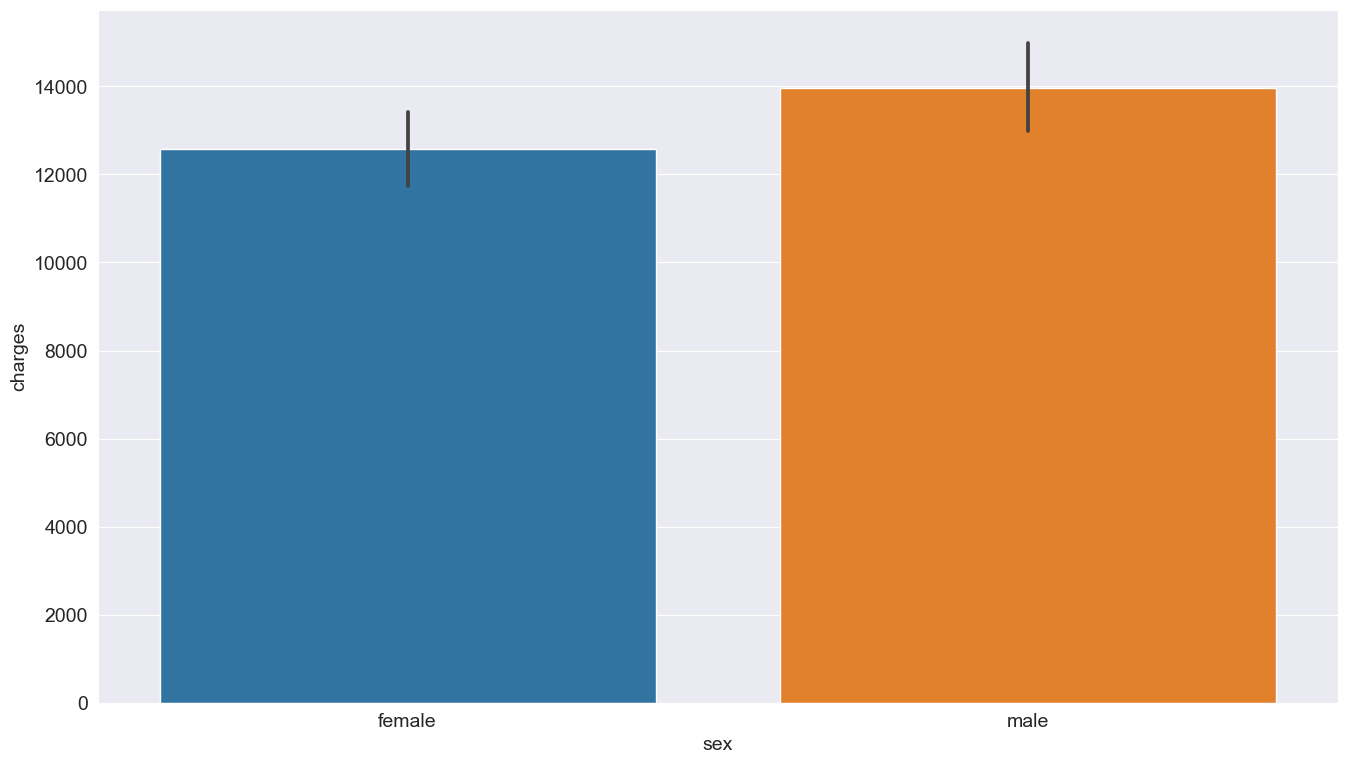

In [71]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [72]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes) #maping numbers inplace as we did in `smoker` column

In [73]:
medical_df.charges.corr(medical_df.sex_code) #still weak coorelation

0.057292062202025415

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the RMSE function
def rmse(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


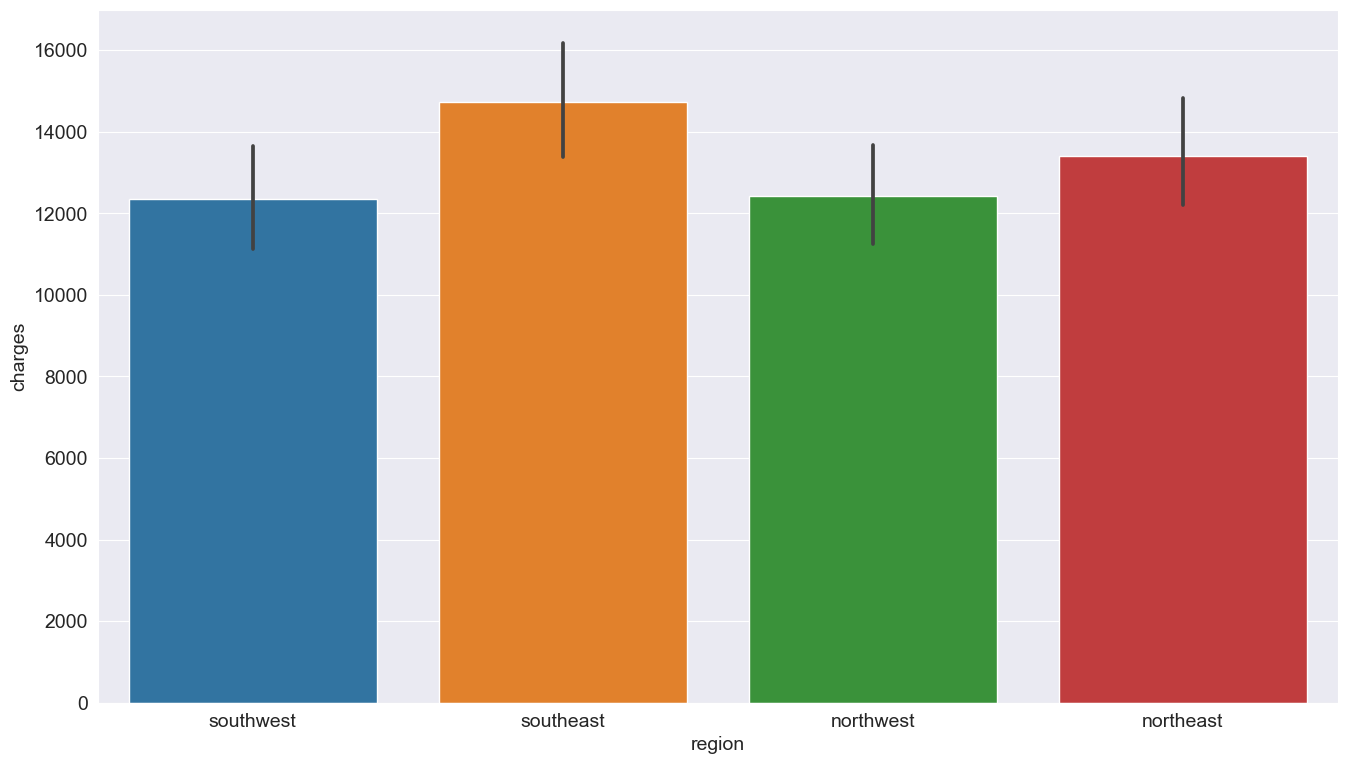

In [75]:
sns.barplot(data=medical_df, x='region', y='charges');

In [76]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [77]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [78]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [79]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
# Since we have the original columns as well the encoded columns i'll select the encoded columns alone

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [80]:
# w
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [81]:
# b
model.intercept_

-12525.547811195462

In [82]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [83]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [84]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] #Scaling can be done only on numerical columns
scaler = StandardScaler()                 #This should not include converted catrgorical columns. More on this below.
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [85]:
scaler.mean_ #this is the mean predicted for these columns induvidually

array([39.20702541, 30.66339686,  1.09491779])

In [86]:
scaler.var_  #this is the variance predicted for these columns induvidually

array([197.25385199,  37.16008997,   1.45212664])

In [87]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [88]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [89]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [90]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [91]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

#here the inputs is nothing but the numerical columns + categorical columns

In [92]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 7292.894439685983


In [93]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5892.863720642983
